# Pre-processing for text mining

In [1]:
import pandas as pd
import numpy as np
import nltk
!pip install wordcloud

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
!pip install gensim
!pip install pyLDAvis

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
reviews = pd.read_csv("reviews_modifed.csv")
# reviews

In [4]:
text=''
for review in reviews['review']:
    text+=review
text 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
DELETE_WORDS = ['app', 'good','great','love','need']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

In [5]:
text = remove_words(text)
text = remove_short_words(text)

In [6]:
category = reviews['category'].unique()
category

array(['Health & Fitness', 'Shopping', 'Medical', 'Games', 'Utilities',
       'Social Networking', 'Travel', 'Sports', 'Lifestyle',
       'Productivity', 'Entertainment', 'Photo & Video', 'Finance',
       'News', 'Education', 'Weather', 'Business', 'Navigation',
       'Books & Reference', 'Food & Drink'], dtype=object)

In [7]:
category_list = list(category)

In [8]:
review_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

In [9]:
# 'Health & Fitness', 'Shopping', 'Medical', 'Games', 'Utilities',
#        'Social Networking', 'Travel', 'Sports', 'Lifestyle',
#        'Productivity', 'Entertainment', 'Photo & Video', 'Finance',
#        'News', 'Education', 'Weather', 'Business', 'Navigation',
#        'Books & Reference', 'Food & Drink'], dtype=object
for k in range(len(reviews['review'])):
    for i in range(len(category)):
        if reviews['category'].iloc[k] == category[i]:
            review_list[i].append(reviews['review'].iloc[k])
        else:
            pass

In [10]:
review_list[0]

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 "Health It's important world either life . think? :)",
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God health',
 '

In [11]:
# list_all

In [12]:
text_list = ['','','','','','','','','','','','','','','','','','','','']

In [13]:
for i in range(len(text_list)):
#     print(i)
#     i+='a'
#     for review in review_list[i]:
    text_list[i] = text_list[i].join(review_list[i])
#     print(text_list[i])

In [14]:
text_list[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"This help eating healthy exercise regular basisWorks great especially going grocery storeBest idea usBest wayAmazingLooking forward app,It helpful site ! It help foods get !good you.Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!Good health...... Good health first priority.......Health It\'s important world either life . think? :)Mrs sunita bhati I thankful developers,to make kind app, really good healthy food bodyVery Useful in diabetes age 30. I need control sugar. thanksOne greatest apps.good niceHealthy Really helpedGod healthHEALTH SHOULD ALWAYS BE TOP PRIORITY. !!. ON MYSG5.An excellent A usefulI found lot wealth form heal

In [15]:
name_review = list(zip(category_list, text_list))
name_review

[('Health & Fitness',
  'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"This help eating healthy exercise regular basisWorks great especially going grocery storeBest idea usBest wayAmazingLooking forward app,It helpful site ! It help foods get !good you.Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!Good health...... Good health first priority.......Health It\'s important world either life . think? :)Mrs sunita bhati I thankful developers,to make kind app, really good healthy food bodyVery Useful in diabetes age 30. I need control sugar. thanksOne greatest apps.good niceHealthy Really helpedGod healthHEALTH SHOULD ALWAYS BE TOP PRIORITY. !!. ON MYSG5.An excellent A usefulI fo

# Sentiment Analysis and Visualization of the results

<h3>Hu and Liu's sentiment analysis lexicon: words coded as either positive or negative</h3>

In [16]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)##.pop remove item at current index
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [17]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

do_pos_neg_sentiment_analysis(name_review)

[('Health & Fitness', 0.07609189498844399, 0.032277818382948464),
 ('Shopping', 0.05930491531568861, 0.03299321489615165),
 ('Medical', 0.06688327399675088, 0.029345684559814733),
 ('Games', 0.0677476427154282, 0.04530486183551165),
 ('Utilities', 0.0660968094622801, 0.0375211211609184),
 ('Social Networking', 0.05870130584949018, 0.036808718506185244),
 ('Travel', 0.05947368421052632, 0.03243421052631579),
 ('Sports', 0.05834909532136612, 0.03765033367831269),
 ('Lifestyle', 0.07109451758695225, 0.03045785026527805),
 ('Productivity', 0.058301616331372645, 0.032005338342148186),
 ('Entertainment', 0.06704315912259239, 0.03718455717090102),
 ('Photo & Video', 0.061652876597662665, 0.034802485431892086),
 ('Finance', 0.05722538393342294, 0.034375268109932224),
 ('News', 0.050736179635600794, 0.04339380754438445),
 ('Education', 0.07616391332332118, 0.025144818708431667),
 ('Weather', 0.06019095060190951, 0.0352843503528435),
 ('Business', 0.06678105696636925, 0.03603294440631435),
 ('Na

In [18]:
df = pd.DataFrame(do_pos_neg_sentiment_analysis(name_review),columns=['Category', 'Positive', 'Negative'])

In [19]:
# df

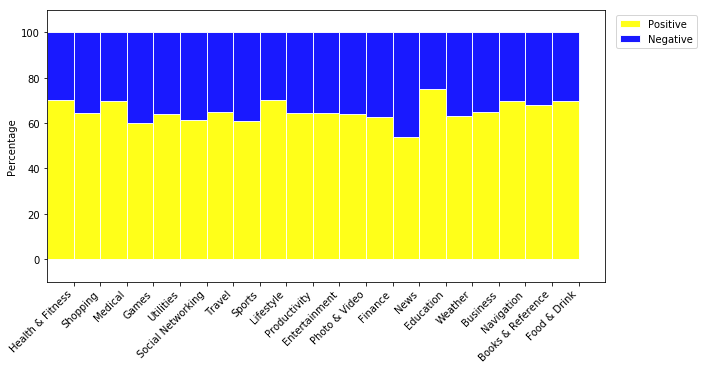

In [20]:
## percentage stack bar chart- sentiment analysis- pos vs. neg
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))
# Set bar width at 1
bar_width = 1
# positions of the left bar-boundaries
bar_l = [i for i in range(len(df['Positive']))] 
# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 
# Create the total score for each category
totals = [i+j for i,j in zip(df['Positive'], df['Negative'])]
# Create the percentage of the total score the pre_score value for each participant was
pos_rel = [i / j * 100 for  i,j in zip(df['Positive'], totals)]
# Create the percentage of the total score the mid_score value for each participant was
neg_rel = [i / j * 100 for  i,j in zip(df['Negative'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       pos_rel, 
       # labeled 
#        label='pos', 
       # with alpha
       alpha=0.9, 
       # with color
       color='yellow',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       label= 'Positive'
       )
# Create a bar chart in position bar_1
ax.bar(bar_l, 
       neg_rel, 
       bottom=pos_rel, 
       # labeled 
#        label='neg', 
       # with alpha
       alpha=0.9, 
       # with color
       color='blue', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white',
       label = 'Negative'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, df['Category'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")
# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)
# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# shot plot
plt.show()

<h3>NRC Emotion Lexicon: words coded into emotional categories (many languages)</h3>

In [21]:
def get_nrc_data():
    nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [22]:
emotion_dict = get_nrc_data()

In [23]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [24]:
def comparative_emotion_analyzer(text_tuples,object_name="Category",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)  
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it        
comparative_emotion_analyzer(name_review)

Fear     Trust  Negative  Positive       Joy   Disgust  \
Category                                                                        
Health & Fitness   0.014559  0.042401  0.028780  0.072481  0.039056  0.009265   
Shopping           0.015478  0.037661  0.025442  0.068931  0.038100  0.007457   
Medical            0.015024  0.038935  0.024123  0.065640  0.025393  0.006644   
Games              0.018881  0.036340  0.036738  0.064744  0.035855  0.010278   
Utilities          0.018241  0.029313  0.030826  0.051971  0.023807  0.008440   
Social Networking  0.013498  0.033604  0.029176  0.050946  0.023967  0.008904   
Travel             0.012104  0.038789  0.027963  0.057604  0.027404  0.006551   
Sports             0.017458  0.029780  0.028882  0.051388  0.025117  0.010055   
Lifestyle          0.012629  0.034409  0.022685  0.060192  0.034171  0.006958   
Productivity       0.013602  0.030696  0.026688  0.052071  0.022650  0.006801   
Entertainment      0.018328  0.034333  0.027363  0.061610  0.036054  0.009087   
Photo & Video      0.014780  0.030606  0.028284  0.054633  0.029561  0.007622   
Finance            0.012690  0.052234  0.025929  0.065336  0.029221  0.005762   
News               0.018654  0.031864  0.034231  0.049240  0.019317  0.010179   
Education          0.011256  0.040797  0.023939  0.085927  0.033557  0.005813   
Weather            0.015306  0.036735  0.023469  0.045918  0.019898  0.003571   
Business           0.012509  0.039682  0.027173  0.057410  0.024190  0.005716   
Navigation         0.013067  0.027358  0.019192  0.042466  0.013475  0.003267   
Books & Reference  0.012273  0.027693  0.022343  0.061995  0.022448  0.006818   
Food & Drink       0.009855  0.034694  0.025744  0.069590  0.032683  0.005129   

                   Anticipation   Sadness  Surprise  
Category                                             
Health & Fitness       0.037925  0.019323  0.013740  
Shopping               0.044366  0.011530  0.020679  
Medical                0.029836  0.012908  0.010538  
Games                  0.043159  0.017906  0.016704  
Utilities              0.027407  0.015186  0.013462  
Social Networking      0.031074  0.013748  0.011534  
Travel                 0.031319  0.013942  0.014900  
Sports                 0.038894  0.014805  0.014933  
Lifestyle              0.029881  0.012057  0.011200  
Productivity           0.026293  0.014209  0.010293  
Entertainment          0.040563  0.014663  0.013819  
Photo & Video          0.029986  0.017218  0.012730  
Finance                0.037933  0.013822  0.014679  
News                   0.029307  0.018039  0.010748  
Education              0.029594  0.011520  0.012366  
Weather                0.028571  0.014796  0.010714  
Business               0.028829  0.014580  0.009610  
Navigation             0.033891  0.011025  0.011842  
Books & Reference      0.023917  0.012588  0.010385  
Food & Drink           0.034091  0.013878  0.009453

In [25]:
df = comparative_emotion_analyzer(name_review)
df

Fear     Trust  Negative  Positive       Joy   Disgust  \
Category                                                                        
Health & Fitness   0.014559  0.042401  0.028780  0.072481  0.039056  0.009265   
Shopping           0.015478  0.037661  0.025442  0.068931  0.038100  0.007457   
Medical            0.015024  0.038935  0.024123  0.065640  0.025393  0.006644   
Games              0.018881  0.036340  0.036738  0.064744  0.035855  0.010278   
Utilities          0.018241  0.029313  0.030826  0.051971  0.023807  0.008440   
Social Networking  0.013498  0.033604  0.029176  0.050946  0.023967  0.008904   
Travel             0.012104  0.038789  0.027963  0.057604  0.027404  0.006551   
Sports             0.017458  0.029780  0.028882  0.051388  0.025117  0.010055   
Lifestyle          0.012629  0.034409  0.022685  0.060192  0.034171  0.006958   
Productivity       0.013602  0.030696  0.026688  0.052071  0.022650  0.006801   
Entertainment      0.018328  0.034333  0.027363  0.061610  0.036054  0.009087   
Photo & Video      0.014780  0.030606  0.028284  0.054633  0.029561  0.007622   
Finance            0.012690  0.052234  0.025929  0.065336  0.029221  0.005762   
News               0.018654  0.031864  0.034231  0.049240  0.019317  0.010179   
Education          0.011256  0.040797  0.023939  0.085927  0.033557  0.005813   
Weather            0.015306  0.036735  0.023469  0.045918  0.019898  0.003571   
Business           0.012509  0.039682  0.027173  0.057410  0.024190  0.005716   
Navigation         0.013067  0.027358  0.019192  0.042466  0.013475  0.003267   
Books & Reference  0.012273  0.027693  0.022343  0.061995  0.022448  0.006818   
Food & Drink       0.009855  0.034694  0.025744  0.069590  0.032683  0.005129   

                   Anticipation   Sadness  Surprise  
Category                                             
Health & Fitness       0.037925  0.019323  0.013740  
Shopping               0.044366  0.011530  0.020679  
Medical                0.029836  0.012908  0.010538  
Games                  0.043159  0.017906  0.016704  
Utilities              0.027407  0.015186  0.013462  
Social Networking      0.031074  0.013748  0.011534  
Travel                 0.031319  0.013942  0.014900  
Sports                 0.038894  0.014805  0.014933  
Lifestyle              0.029881  0.012057  0.011200  
Productivity           0.026293  0.014209  0.010293  
Entertainment          0.040563  0.014663  0.013819  
Photo & Video          0.029986  0.017218  0.012730  
Finance                0.037933  0.013822  0.014679  
News                   0.029307  0.018039  0.010748  
Education              0.029594  0.011520  0.012366  
Weather                0.028571  0.014796  0.010714  
Business               0.028829  0.014580  0.009610  
Navigation             0.033891  0.011025  0.011842  
Books & Reference      0.023917  0.012588  0.010385  
Food & Drink           0.034091  0.013878  0.009453

In [26]:
df = df.reset_index(drop=False)

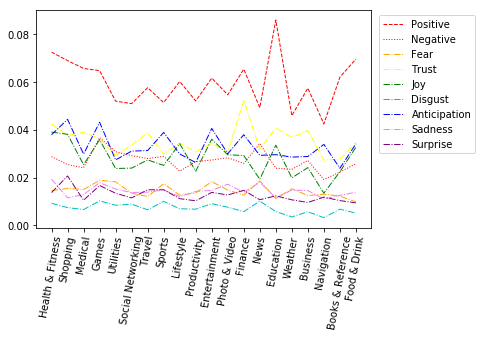

In [27]:
import matplotlib.pyplot as plt
plt.plot(df['Category'],df['Positive'],color='red', linewidth=1.0, linestyle='--', label='Positive')
plt.plot(df['Category'],df['Negative'],color='red', linewidth=1.0, linestyle=':', label='Negative')
plt.plot(df['Category'],df['Fear'],color='orange', linewidth=1.0, linestyle='-.', label='Fear')
plt.plot(df['Category'],df['Trust'],color='yellow', linewidth=1.0, linestyle='-.', label='Trust')
plt.plot(df['Category'],df['Joy'],color='green', linewidth=1.0, linestyle='-.', label='Joy')
plt.plot(df['Category'],df['Disgust'],color='c', linewidth=1.0, linestyle='-.', label='Disgust')
plt.plot(df['Category'],df['Anticipation'],color='blue', linewidth=1.0, linestyle='-.', label='Anticipation')
plt.plot(df['Category'],df['Sadness'],color='violet', linewidth=1.0, linestyle='-.', label='Sadness')
plt.plot(df['Category'],df['Surprise'],color='purple', linewidth=1.0, linestyle='-.', label='Surprise')
plt.xticks(rotation=80)
# plt.legend(loc = 'upper right')
# plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
lgd = plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

<h3>Vadar Sentiment tool</h3> 

In [28]:
def vader_comparison(reviews):
    from nltk import sent_tokenize
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import pandas as pd
    headers = ['pos','neg','neu','compound']
    analyzer = SentimentIntensityAnalyzer()
    result = list()
    
    for i in range(len(reviews)):
        name = reviews[i][0]
        sentences = sent_tokenize(reviews[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        result.append([name, pos, neg, neu, compound])
        
    df_v = pd.DataFrame(result, columns = ['name','pos','neg','neu','compound'])
    df_v.set_index('name', inplace = True)
    df_v.sort_values(by = 'compound', ascending = False, inplace = True)
    
    return df_v

In [29]:
df_v = vader_comparison(name_review)
df_v

pos       neg       neu  compound
name                                                     
Education          0.252389  0.056144  0.691471  0.293627
Health & Fitness   0.246774  0.074514  0.678212  0.266089
Lifestyle          0.240664  0.079220  0.679048  0.250998
Books & Reference  0.211262  0.073763  0.714963  0.222328
Medical            0.211413  0.069570  0.719019  0.216733
Food & Drink       0.210945  0.075443  0.713617  0.212487
Business           0.206318  0.081567  0.712110  0.208589
Games              0.236958  0.111999  0.650478  0.201587
Entertainment      0.216206  0.094831  0.688392  0.198677
Photo & Video      0.206602  0.088773  0.703338  0.195847
Productivity       0.205381  0.075465  0.718284  0.190002
Shopping           0.211829  0.098024  0.690149  0.181706
Utilities          0.198094  0.090988  0.710266  0.171662
Sports             0.190641  0.096870  0.710631  0.167358
Travel             0.178295  0.100670  0.719737  0.161910
Navigation         0.145854  0.085211  0.768941  0.149954
Finance            0.185529  0.096429  0.717675  0.149556
Social Networking  0.185293  0.099215  0.714265  0.142185
Weather            0.178397  0.109787  0.711799  0.138575
News               0.157086  0.105272  0.735776  0.082752

In [30]:
df_v = df_v.reset_index(drop = False)

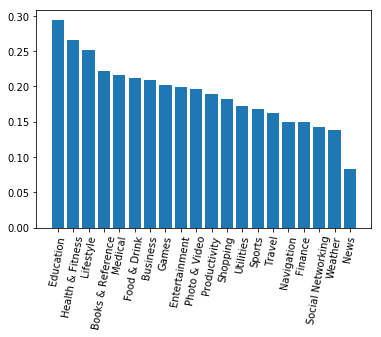

In [31]:
plt.bar(df_v['name'],df_v['compound'])
plt.xticks(rotation=80)
plt.show()

# Word Cloud

<h3>All reviews compact</h3> 

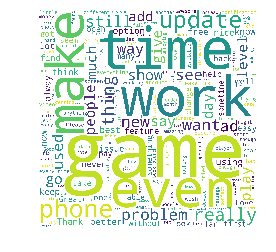

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text) #WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

<h3>Word clouds on reviews by category</h3> 

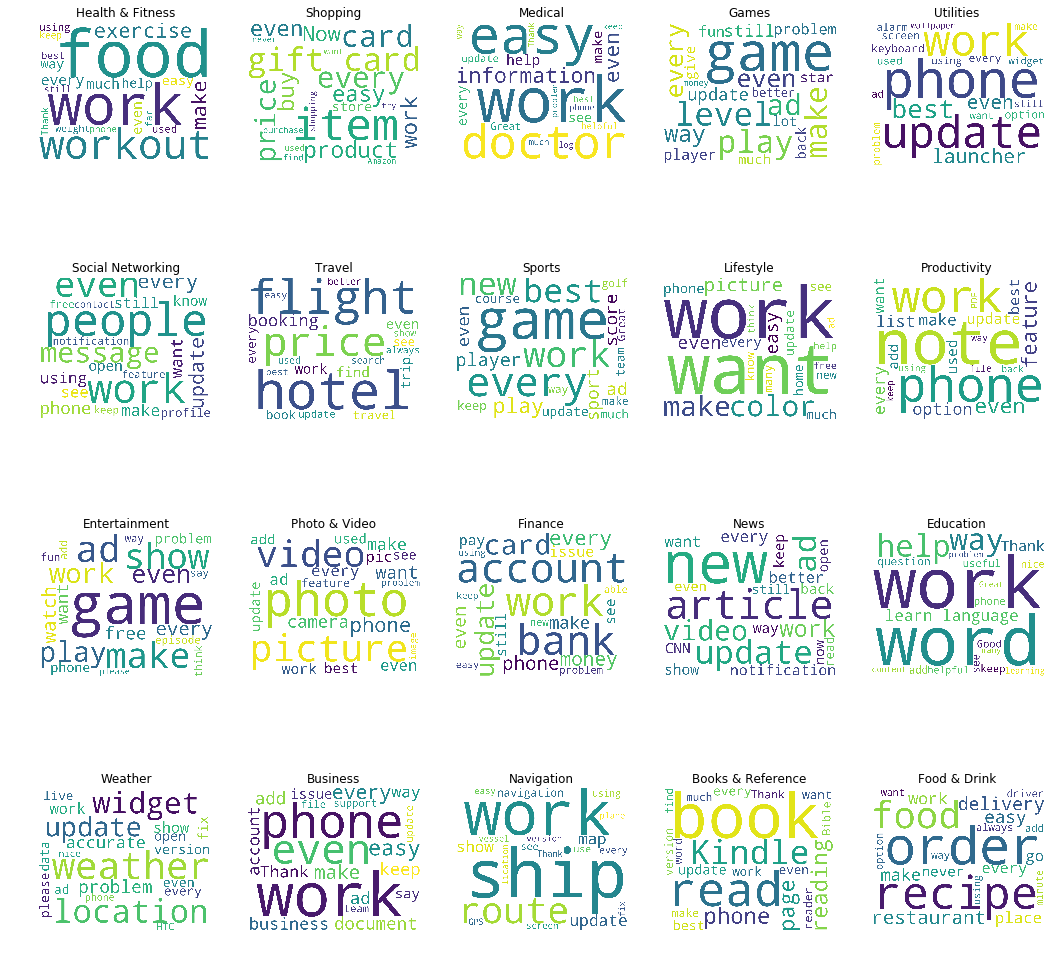

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
#Remove unwanted words
DELETE_WORDS = ['app','great','good','love','need','time','day','thing','really']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string

#Set up cloud
COL_NUM = 5
ROW_NUM = 4
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,18))

for i in range(0,len(name_review)):
    text_string = remove_words(name_review[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//5, i%5] 
    ax.set_title(name_review[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

# Topic analysis

In [34]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [35]:
#for all reviews
def get_topics(num_topics = 5, passes = 10, num_words = 8):
    from nltk import sent_tokenize
    from gensim import corpora
    from gensim.models.ldamodel import LdaModel
    from gensim.parsing.preprocessing import STOPWORDS
    import pprint
    import pyLDAvis.gensim
    review_list = list()
    
    for review in name_review:
        review_list.append(review[1])
    for i in range(len(review_list)):
        review = review_list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        review_list[i] = ' '.join(sents)
        
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word in ['app','great','good','love','need','time','day','thing','really']]
        for review in review_list]

    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    pp = pprint.PrettyPrinter(indent=4)
    print(pp.pprint(lda.print_topics(num_words)))

    return pyLDAvis.display(lda_display)

In [36]:
get_topics()

[   (   0,
        '0.013*"like" + 0.007*"easy" + 0.006*"want" + 0.005*"phone" + '
        '0.004*"way" + 0.004*"new" + 0.004*"update" + 0.004*"best" + '
        '0.004*"work" + 0.004*"able"'),
    (   1,
        '0.009*"like" + 0.007*"easy" + 0.006*"learn" + 0.006*"way" + '
        '0.005*"learning" + 0.005*"language" + 0.005*"work" + 0.004*"add" + '
        '0.004*"better" + 0.004*"new"'),
    (   2,
        '0.013*"news" + 0.011*"like" + 0.006*"want" + 0.005*"open" + '
        '0.005*"update" + 0.005*"phone" + 0.005*"notes" + 0.004*"new" + '
        '0.004*"google" + 0.004*"work"'),
    (   3,
        '0.013*"like" + 0.006*"phone" + 0.006*"update" + 0.006*"people" + '
        '0.006*"new" + 0.005*"work" + 0.004*"want" + 0.004*"easy" + '
        '0.004*"dating" + 0.004*"know"'),
    (   4,
        '0.045*"game" + 0.015*"like" + 0.012*"play" + 0.008*"ads" + '
        '0.007*"fun" + 0.006*"level" + 0.006*"playing" + 0.005*"fix" + '
        '0.005*"way" + 0.005*"want"')]
None


C:\Users\T480S\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


 <h6>We do topic modelling on two of the categories: food&drink and shopping </h6> 

In [37]:
##for the first two topics: 1
def get_topics1(num_topics = 5, passes = 10, num_words = 8):
    from nltk import sent_tokenize
    from gensim import corpora
    from gensim.models.ldamodel import LdaModel
    from gensim.parsing.preprocessing import STOPWORDS
    import pprint
    import pyLDAvis.gensim
    review_list = list()
    
    for review in name_review:
        review_list.append(review[1])
    for i in range(len(review_list)):
        review = review_list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        review_list[i] = ' '.join(sents)
        
    texts = [[word for word in review_list[0].lower().split()
        if word not in STOPWORDS and word.isalnum() and not word in ['app','great','good','love','need','time','day','thing','really']]]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    pp = pprint.PrettyPrinter(indent=4)
    print(pp.pprint(lda.print_topics(num_words)))

    return pyLDAvis.display(lda_display)

In [38]:
##for the first two topics: 2
def get_topics2(num_topics = 5, passes = 10, num_words = 8):
    from nltk import sent_tokenize
    from gensim import corpora
    from gensim.models.ldamodel import LdaModel
    from gensim.parsing.preprocessing import STOPWORDS
    import pprint
    import pyLDAvis.gensim
    review_list = list()
    
    for review in name_review:
        review_list.append(review[1])
    for i in range(len(review_list)):
        review = review_list[i]
        sents = sent_tokenize(review)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        review_list[i] = ' '.join(sents)
        
    texts = [[word for word in review_list[1].lower().split()
        if word not in STOPWORDS and word.isalnum() and not word in ['app','great','good','love','need','time','day','thing','really']]]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,id2word=dictionary,num_topics=num_topics,passes=passes)
    lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
    pp = pprint.PrettyPrinter(indent=4)
    print(pp.pprint(lda.print_topics(num_words)))

    return pyLDAvis.display(lda_display)

In [39]:
get_topics1()

[   (   0,
        '0.001*"like" + 0.001*"food" + 0.001*"calories" + 0.001*"track" + '
        '0.001*"weight" + 0.001*"work" + 0.001*"easy" + 0.001*"tried" + '
        '0.001*"way" + 0.001*"wish"'),
    (   1,
        '0.016*"like" + 0.012*"food" + 0.008*"easy" + 0.007*"track" + '
        '0.007*"calories" + 0.006*"weight" + 0.005*"way" + 0.005*"free" + '
        '0.005*"work" + 0.005*"wish"'),
    (   2,
        '0.001*"food" + 0.001*"like" + 0.000*"easy" + 0.000*"calories" + '
        '0.000*"track" + 0.000*"new" + 0.000*"way" + 0.000*"weight" + '
        '0.000*"work" + 0.000*"free"'),
    (   3,
        '0.002*"like" + 0.001*"food" + 0.001*"calories" + 0.001*"easy" + '
        '0.001*"track" + 0.001*"weight" + 0.001*"way" + 0.001*"new" + '
        '0.001*"best" + 0.001*"work"'),
    (   4,
        '0.001*"like" + 0.001*"food" + 0.001*"easy" + 0.001*"weight" + '
        '0.001*"track" + 0.001*"way" + 0.001*"free" + 0.001*"work" + '
        '0.001*"calories" + 0.001*"tried"')]
None


C:\Users\T480S\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [40]:
get_topics2()

[   (   0,
        '0.001*"like" + 0.001*"card" + 0.001*"gift" + 0.001*"easy" + '
        '0.001*"buy" + 0.001*"update" + 0.001*"customer" + 0.001*"cards" + '
        '0.001*"shopping" + 0.001*"money"'),
    (   1,
        '0.001*"like" + 0.001*"easy" + 0.001*"card" + 0.001*"gift" + '
        '0.001*"money" + 0.001*"items" + 0.001*"cards" + 0.001*"update" + '
        '0.001*"buy" + 0.001*"cash"'),
    (   2,
        '0.001*"card" + 0.001*"like" + 0.001*"customer" + 0.001*"gift" + '
        '0.001*"money" + 0.001*"buy" + 0.001*"items" + 0.001*"update" + '
        '0.001*"cash" + 0.001*"try"'),
    (   3,
        '0.012*"card" + 0.012*"like" + 0.010*"gift" + 0.008*"easy" + '
        '0.007*"items" + 0.007*"customer" + 0.006*"buy" + 0.006*"money" + '
        '0.006*"cards" + 0.005*"try"'),
    (   4,
        '0.001*"like" + 0.001*"card" + 0.001*"gift" + 0.001*"easy" + '
        '0.001*"items" + 0.001*"cards" + 0.001*"money" + 0.001*"customer" + '
        '0.001*"cash" + 0.001*"new"')]
Non

C:\Users\T480S\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))
